In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler

In [179]:
import minisom

In [180]:
# Import dataset
file_name = 'iris.txt'
dataset = pd.read_csv(file_name, header=None)

dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,4.6,3.4,1.4,0.3,1


In [181]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
y[0]

1

### Feature Scaling


In [182]:
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [183]:
X.shape

(150, 4)

In [184]:
rows = 8
cols = 8
no_of_features = X.shape[1]
no_of_epoches = 20
no_of_iterations = 200
learning_rate_range = (0.5, 0.01)
initial_radius = max(rows, cols)/2

In [185]:
som_map = np.random.uniform(size=(rows,cols,no_of_features))
prev_som_map = np.zeros((rows,cols,no_of_features))

In [186]:
som_map.shape[:2]

(8, 8)

In [187]:
def euclidian_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

def get_closest_node(data_point, som_map):
    h, w = som_map.shape[:2]
#     print("SOM {} {}".format(w, h))
    smallest_dist = 1000000000
    position = [None, None]
    for i in range(h):
        for j in range(w):
            dist = euclidian_distance(som_map[i][j], data_point)
            if dist < smallest_dist:
                smallest_dist = dist
                position = np.array([i, j])
    return position

def get_current_lr(iteration):
    return learning_rate_range[0] + (learning_rate_range[1] - learning_rate_range[0])* (iteration/no_of_iterations)

def get_current_radius(iteration):
    return initial_radius*math.exp(-iteration/no_of_iterations)

In [188]:
convergence = []

for _iter in range(no_of_iterations):
    current_learning_rate = get_current_lr(_iter)
    current_radius = get_current_radius(_iter)
#     print("Current LR: {}".format(current_learning_rate))
#     print("Current Radius: {}".format(current_radius))
    J = np.linalg.norm(som_map - prev_som_map)
    randomly_selected_data = X[np.random.randint(len(X))]
    bmu_index = get_closest_node(randomly_selected_data, som_map)
    prev_som_map = np.copy(som_map)
    
    for col in range(cols):
        for row in range(rows):
#             print(row, col)
            som_distance = euclidian_distance(bmu_index, np.array([row, col]))
            if som_distance <= current_radius:
                som_map[row][col] = som_map[row][col] + current_learning_rate * ( randomly_selected_data - som_map[row][col])

    convergence.append(J)

print(convergence)
    

[9.253627362859971, 2.19053240627222, 2.6449712484076704, 2.4818154846531955, 0.7483954064736471, 0.5031877524058707, 2.11717849317189, 1.9275850735976858, 1.9632992931204425, 1.082943674236977, 0.7780907443135978, 1.0232707513492494, 1.469860983496146, 1.1109677265120392, 0.5486919119548743, 1.564133185623663, 1.3878166893060602, 1.3198755885255928, 1.3598157522866174, 0.6867204974046591, 0.37163666184501976, 1.0904919079468802, 1.0577698751317606, 0.5692308590036893, 1.1248787899360297, 0.4264649388783706, 0.8475773264764367, 0.7409533832304042, 0.6872450348788934, 0.5585097546291572, 0.6868162249761864, 0.5457385707574343, 0.65226400626669, 0.9271020055555852, 0.3995798221010982, 0.834874511173666, 0.7057887884483167, 1.3149052171548874, 1.022243419515219, 0.8785606323086572, 0.5683616151083335, 0.6330693429201629, 0.8883921538995277, 0.36509469181310555, 0.3370485783254245, 0.7802442230051144, 0.39649618689572746, 0.8287554143213441, 0.2319472772598416, 0.5650110869816443, 0.200064

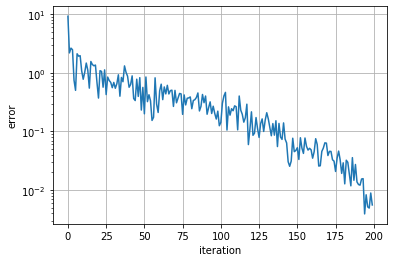

<Figure size 1440x1440 with 0 Axes>

Final error: 0.005568025864591799


In [189]:
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('iteration')
plt.grid(True)
plt.yscale('log')
plt.figure(figsize = (20,20))
plt.show()
# print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))

Red = Class 1
Blue = Class 2
Green = Class 3


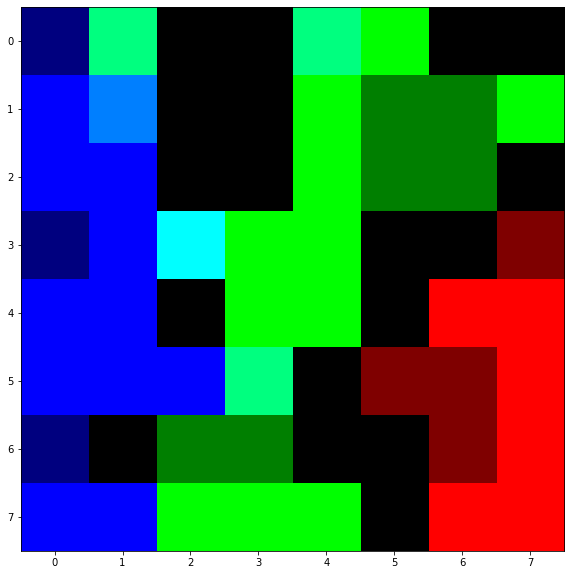

In [190]:
# from scipy.misc import toimage
from PIL import Image


BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([rows,cols,3],dtype=np.float32)

i=0
for i, pattern in enumerate(X):
    
#     pattern_ary = np.tile(pattern, (map_height, map_width, 1))
#     Eucli_MAP = np.linalg.norm(pattern_ary - MAP_final, axis=2)

    # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
    BMU = get_closest_node(pattern, som_map)
    
    row = BMU[0]
    col = BMU[1]
    
    if y[i] == 1:
        if result_map[row][col][0] <= 0.5:
            result_map[row][col] += np.asarray([0.5,0,0])
    elif y[i] == 2:
        if result_map[row][col][1] <= 0.5:
            result_map[row][col] += np.asarray([0,0.5,0])
    elif y[i] == 3:
        if result_map[row][col][2] <= 0.5:
            result_map[row][col] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
    
#print result_map

print("Red = Class 1")
print("Blue = Class 2")
print("Green = Class 3")

plt.figure(figsize = (10,10))
plt.imshow(result_map, interpolation='nearest')

## Use Minisom

In [191]:
som = minisom.MiniSom(x=10, y=10, input_len=4, sigma=1, learning_rate=0.5)
som.random_weights_init(X)

In [192]:
som.train_random(data=X, num_iteration=100)